In [1]:

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pwd

'C:\\Users\\zheng\\Desktop\\MUSA 650 RS\\429\\musa650-final\\script'

In [78]:
data_raw= pd.read_csv('..\\rawdata\\landslide3.csv')
data_raw.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID
0,R,14.0,8.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,0
1,R,13.0,6.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,1
2,R,15.0,13.5,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,295.115,-9999.0,2
3,R,18.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,150.945,-9999.0,3
4,R,17.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,133.977,-9999.0,4


#### data process


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

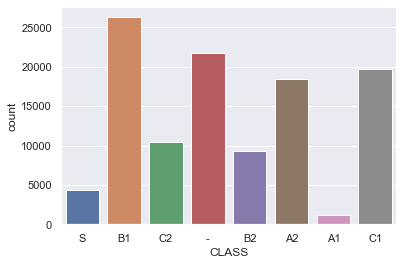

In [79]:
#lot of '-' meaning uncategorized landslide
sns.countplot(data_raw['CLASS'] )

In [80]:
#todo: nothing to change here, we select 10000 data randomly
data=data_raw.sample(n=10000)

In [81]:
data.shape

(10000, 16)

In [82]:
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]
data1=data[~data['ELE_DIFF'].isin([9999])]

#newly added data: curv_plan, curv_prof, aspect, curv
data1=data[~data['curv_plan'].isin([-9999])]
data1=data[~data['curv_prof'].isin([-9999])]
data1=data[~data['aspect'].isin([-9999])]
data1=data[~data['curv'].isin([-9999])]

data1['history']=2022-data1['YEAR_1']

C:\Users\zheng\AppData\Local\Temp/ipykernel_21252/1462027589.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['history']=2022-data1['YEAR_1']


In [83]:
data1

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID,history
75042,R,9.0,6.5,9999.0,C,1963,9999.0,9999.0,9999.0,N,A2,-0.144833,0.125461,42.0454,-0.270293,75042,59
30412,R,12.0,14.0,40.5,D,1963,223.0,212.0,11.0,N,B1,0.343781,-0.196805,155.3330,0.540587,30412,59
67425,R,7.5,12.5,40.5,C,1963,272.0,263.0,9.0,N,A2,-0.217550,-0.106975,-9999.0000,-0.110575,67425,59
39878,R,9.0,9.5,31.0,C,1963,160.0,155.0,5.0,N,C1,-0.328882,0.125703,266.7480,-0.454584,39878,59
26933,R,33.0,13.0,29.5,D,1963,152.0,142.0,10.0,N,C2,0.113420,-0.304307,227.2720,0.417726,26933,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30957,R,14.0,16.0,46.0,D,1963,487.0,472.0,15.0,N,B2,-0.045132,0.348022,200.2250,-0.393154,30957,59
4536,R,10.0,7.5,37.5,C,1963,259.0,252.0,7.0,N,A2,0.469400,-0.157189,213.8640,0.626589,4536,59
49599,O,4.5,25.0,50.5,A,1983,268.0,249.0,19.0,N,-,-0.067045,0.436683,194.4440,-0.503728,49599,39
27154,O,7.0,8.0,44.0,A,1993,103.0,89.0,14.0,N,-,0.230040,0.119465,-9999.0000,0.110575,27154,29


In [84]:
data1.to_csv('../save_data/data_mapping.csv')

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

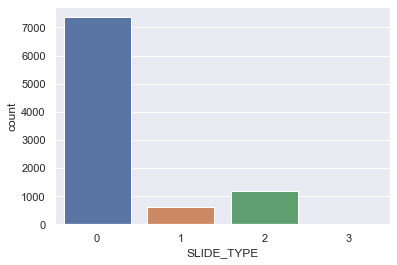

In [85]:

data2=data1.drop(['YEAR_1','CLASS','ID'], axis=1)
#remove class
data2 = pd.get_dummies(data1, columns=['COVER','GULLY'])
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

sns.countplot(data2['SLIDE_TYPE'] )

In [86]:
data2.shape

(9201, 21)

In [87]:
data2.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,CLASS,curv_plan,...,aspect,curv,ID,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
75042,0,9.0,6.5,9999.0,1963,9999.0,9999.0,9999.0,A2,-0.144833,...,42.0454,-0.270293,75042,59,0,0,1,0,1,0
30412,0,12.0,14.0,40.5,1963,223.0,212.0,11.0,B1,0.343781,...,155.3330,0.540587,30412,59,0,0,0,1,1,0
67425,0,7.5,12.5,40.5,1963,272.0,263.0,9.0,A2,-0.217550,...,-9999.0000,-0.110575,67425,59,0,0,1,0,1,0
39878,0,9.0,9.5,31.0,1963,160.0,155.0,5.0,C1,-0.328882,...,266.7480,-0.454584,39878,59,0,0,1,0,1,0
26933,0,33.0,13.0,29.5,1963,152.0,142.0,10.0,C2,0.113420,...,227.2720,0.417726,26933,59,0,0,0,1,1,0


In [88]:
data2=data2.drop(['YEAR_1','CLASS','ID'], axis=1)

col= data2.columns[pd.np.r_[1:18]]
x = np.array(data2[col])
y=np.array(data2['SLIDE_TYPE'])
# collect data with train data:test data is 3:7
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\zheng\AppData\Local\Temp/ipykernel_21252/3651009330.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data2.columns[pd.np.r_[1:18]]


In [89]:
print(y.shape)
print(x.shape)
print(X_train.shape)
print(y_train.shape)

(9201,)
(9201, 17)
(6440, 17)
(6440,)


In [90]:
y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [91]:
X_train[:5,:]

array([[ 5.00000e+00,  6.50000e+00,  2.55000e+01,  9.70000e+01,
         9.40000e+01,  3.00000e+00, -2.26744e-01,  1.66409e-01,
         2.81310e+02, -3.93154e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 2.00000e+01,  7.50000e+00,  4.55000e+01,  1.38000e+02,
         1.31000e+02,  7.00000e+00, -2.04540e-03,  4.70988e-02,
         1.34552e+02, -4.91442e-02,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.20000e+01,  1.45000e+01,  3.10000e+01,  1.86000e+02,
         1.78000e+02,  8.00000e+00, -1.23633e-01, -1.30582e-02,
         1.99646e+02, -1.10575e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 6.00000e+00,  9.00000e+00,  3.70000e+01,  3.32000e+02,
         3.26000e+02,  6.00000e+00, -1.08211e-02,  1.46494e-03,
         1.13629e+02, -1.22861e-02,

### changes of data processing

In [92]:
# the input of gan in svd package is df, here convert the numpy into df
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])
train_data.head()


C:\Users\zheng\AppData\Local\Temp/ipykernel_21252/2506634044.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,5.0,6.5,25.5,97.0,94.0,3.0,-0.226744,0.166409,281.310,-0.393154,59.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,20.0,7.5,45.5,138.0,131.0,7.0,-0.002045,0.047099,134.552,-0.049144,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,12.0,14.5,31.0,186.0,178.0,8.0,-0.123633,-0.013058,199.646,-0.110575,59.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,6.0,9.0,37.0,332.0,326.0,6.0,-0.010821,0.001465,113.629,-0.012286,59.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,17.0,9.0,40.5,157.0,149.0,8.0,0.245905,0.147617,164.103,0.098289,59.0,0.0,0.0,1.0,0.0,1.0,0.0


### GAN Core

In [93]:
# todo(important!): if you have GPU, cuda = True, else cuda = False 
model = CTGAN(cuda=True)

# todo(important!): here we train gan model according to original train_data
# tune the parameter according to ref doc: https://sdv.dev/SDV/user_guides/single_table/ctgan.html
model.fit(train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

In [94]:
original_train.shape

(6440, 18)

In [95]:

# todo: nothing needs to change but a reminder: 
# once you decide to use previous model, just load it, you don't need to train it again!

# save gan model 
model.save('new_trial\\my_model2.pkl')


In [96]:
# load gan model 
loaded = CTGAN.load('new_trial\\my_model2.pkl')

In [97]:
# generate new data, the original data: new data = 1:1 
# todo: you can change the ratio between original data: new data by 'num_rows'
new_data = loaded.sample(num_rows=train_data.shape[0])

In [98]:
new_data.shape

(6440, 18)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

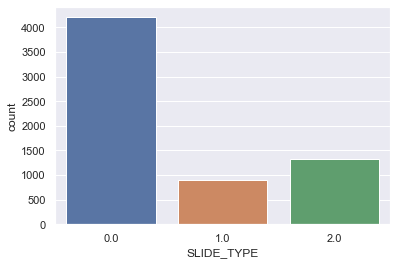

In [99]:
# label ditribution in sythetic data
# filter 
# todo(important!): nothing need to change, but remember to tune the parameter according to the this plot
sns.countplot(new_data['SLIDE_TYPE'] )


In [61]:
# todo(important!): understand the evaluation metric and add it to report 
# and use other metrics with doc below to evaluate and figure out what is wrong with new data
# ref doc: https://sdv.dev/SDV/user_guides/evaluation/index.html#evaluation
evaluate(new_data, train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5731210564151478

In [100]:
# new train data: the mixture of original and generative data
new_train=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train.shape)
new_train.head()

(12880, 18)


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,8.7,20.7,38.634789,318.661715,571.959978,27.325018,0.586169,-0.396131,107.914725,0.348917,59.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,5.8,4.7,34.470454,154.071672,110.461597,18.633717,-0.232928,-0.222400,244.925406,0.220507,59.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,16.1,11.3,15.611865,187.579574,185.696650,3.624800,-0.021550,-0.205482,214.375802,0.719118,59.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,13.1,4.7,4.703837,316.687248,294.963139,2.000000,0.089655,0.009188,-9999.000000,0.175167,59.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,11.7,6.9,25.169452,23.317182,142.847656,2.000000,-0.222681,0.307003,146.265481,-0.034688,14.0,1.0,0.0,0.0,0.0,1.0,0.0


In [102]:
#shuffle data
new_train_data = new_train.sample(frac=1).reset_index(drop=True)


In [103]:
# convert df to numpy for training input 
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [104]:
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(12880, 17)
(2761, 17)
(12880,)
(2761,)


In [105]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X)
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

## 2. Logistic Regression

In [106]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best score: 0.8698757763975156
Best hyperparameters: {'C': 10.0}


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [107]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(new_train_X, new_train_Y.ravel())

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [108]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

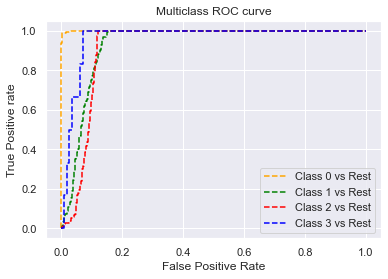

In [109]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, lr_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [110]:
lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic regression:')
print('Accuracy:',lr_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

Logistic regression:
Accuracy: 0.9116262223831945


Confusion Matrix:


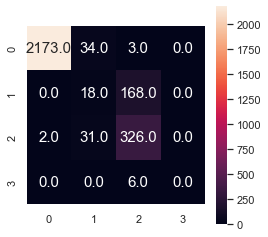

In [112]:
array = confusion_matrix(y_test, lr_pred)

lr_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(lr_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [113]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (lr_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (lr_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (lr_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.9991 
Recall on Y label = 0.9833 
F1 on Y label = 0.9911 
----------------------------
1
Precision  = 0.2169 
Recall on Y label = 0.0968 
F1 on Y label = 0.1338 
----------------------------
2
Precision  = 0.6481 
Recall on Y label = 0.9081 
F1 on Y label = 0.7564 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------


## Predict the landslide with logistic regression model

In [ ]:
#apply logistic model to the whole dataset


In [115]:
data4= pd.read_csv('../save_data/data_mapping.csv')
data4.head()

,Unnamed: 0,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID,history
0,75042,R,9.0,6.5,9999.0,C,1963,9999.0,9999.0,9999.0,N,A2,-0.144833,0.125461,42.0454,-0.270293,75042,59
1,30412,R,12.0,14.0,40.5,D,1963,223.0,212.0,11.0,N,B1,0.343781,-0.196805,155.3330,0.540587,30412,59
2,67425,R,7.5,12.5,40.5,C,1963,272.0,263.0,9.0,N,A2,-0.217550,-0.106975,-9999.0000,-0.110575,67425,59
3,39878,R,9.0,9.5,31.0,C,1963,160.0,155.0,5.0,N,C1,-0.328882,0.125703,266.7480,-0.454584,39878,59
4,26933,R,33.0,13.0,29.5,D,1963,152.0,142.0,10.0,N,C2,0.113420,-0.304307,227.2720,0.417726,26933,59


In [116]:
data4.shape

(9201, 18)

In [117]:
lr_pred_all=lr.predict(x)
lr_pred_all.shape

(9201,)

In [118]:
lr_pred_all1=pd.DataFrame(lr_pred_all, columns = ['predict'])

In [119]:
lr_pred_all1

,predict
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9196,0.0
9197,0.0
9198,1.0
9199,2.0


In [120]:
finalDf = pd.concat([data4, lr_pred_all1], axis = 1)
finalDf.head()

,Unnamed: 0,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID,history,predict
0,75042,R,9.0,6.5,9999.0,C,1963,9999.0,9999.0,9999.0,N,A2,-0.144833,0.125461,42.0454,-0.270293,75042,59,0.0
1,30412,R,12.0,14.0,40.5,D,1963,223.0,212.0,11.0,N,B1,0.343781,-0.196805,155.3330,0.540587,30412,59,0.0
2,67425,R,7.5,12.5,40.5,C,1963,272.0,263.0,9.0,N,A2,-0.217550,-0.106975,-9999.0000,-0.110575,67425,59,0.0
3,39878,R,9.0,9.5,31.0,C,1963,160.0,155.0,5.0,N,C1,-0.328882,0.125703,266.7480,-0.454584,39878,59,0.0
4,26933,R,33.0,13.0,29.5,D,1963,152.0,142.0,10.0,N,C2,0.113420,-0.304307,227.2720,0.417726,26933,59,0.0


In [121]:
finalDf.to_csv('../save_data/data_mapping2.csv')